# Day 57 – Cross-Validation and ROC/AUC Curves 

## Introduction

Today, I explore **Cross-Validation** and **ROC/AUC curves**, two important techniques for evaluating classification models.  

Cross-validation helps estimate how well a model generalizes by training and testing on different data folds, instead of relying on a single train-test split.  
ROC (Receiver Operating Characteristic) curves and AUC (Area Under Curve) provide deeper insights into model performance across classification thresholds.  

In this notebook, I apply cross-validation to measure accuracy and ROC-AUC, and then plot the ROC curve with AUC score to evaluate how well the model distinguishes between classes.

---

## 1. The Problem with a Simple Train/Test Split

When we split our data into a single training and testing set, we run into a few potential issues:
* **Data Leakage**: Information from the test set can unintentionally influence the training process, leading to an overly optimistic performance score.
* **Model Instability**: The performance of the model can be highly dependent on which specific data points end up in the test set. If the test set is, by chance, very easy, our model will appear to be better than it actually is.
* **Wasted Data**: A simple split means we hold out a portion of our data purely for testing, which reduces the amount of data available for training.

This is where **Cross-Validation** comes in.

---

## 2. Cross-Validation: A Better Way to Evaluate

**Cross-Validation** is a technique for evaluating a model's performance by training it on multiple different subsets of the data. The goal is to get a more reliable and stable estimate of how the model will perform on unseen data.


### Types of Cross-Validation
- **k-Fold Cross-Validation**:  
  - Data is split into *k* equal folds.  
  - Model is trained on k-1 folds and tested on the remaining fold.  
  - This is repeated k times, and results are averaged.  

- **Stratified k-Fold**:  
  - Similar to k-Fold but preserves the class distribution in each fold.  
  - Especially important for classification problems.  

- **Nested Cross-Validation**:  
  - Used when performing hyperparameter tuning.  
  - An inner loop tunes parameters, while an outer loop evaluates performance.  
  - Prevents data leakage and overly optimistic results.


### How it works: K-Fold Cross-Validation

The most common form is **K-Fold Cross-Validation**:
1.  The entire dataset is divided into `K` equal-sized parts, or "folds."
2.  The model is trained `K` times. In each iteration, one fold is used as the **testing set**, and the remaining `K-1` folds are combined to form the **training set**.
3.  The model's performance (e.g., accuracy, MSE) is recorded for each of the `K` iterations.
4.  The final performance metric is the **average** of the scores from all `K` iterations.


**Why it's better:**
* It ensures that every data point gets to be in the test set exactly once, giving a more representative measure of the model's performance.
* It provides an average score and a standard deviation of the scores, which gives us a better idea of the model's stability.
* It reduces the risk of overfitting to a single train/test split.
* It helps in selecting the best model or hyperparameters.  

---

## 3. ROC and AUC Curves: Evaluating Classification Models

The **Receiver Operating Characteristic (ROC) Curve** and the **Area Under the Curve (AUC)** are powerful tools for evaluating the performance of a classification model.

### The ROC Curve

The ROC curve is a graph that visualizes a model's performance at all possible classification thresholds.
* It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at different thresholds.
* **True Positive Rate (TPR)**: Also known as **Recall** or **Sensitivity**, this is the proportion of actual positive cases that the model correctly identified.
  $$TPR = \frac{True Positives}{True Positives + False Negatives}$$
* **False Positive Rate (FPR)**: The proportion of actual negative cases that the model incorrectly identified as positive.
  $$FPR = \frac{False Positives}{False Positives + True Negatives}$$
* The ideal ROC curve would go straight up from the bottom-left corner and then across to the top-right, representing a perfect classifier. A purely random classifier would be represented by a diagonal line.


### The AUC (Area Under the Curve)

The **Area Under the Curve (AUC)** is a single number that summarizes the entire ROC curve.
* The AUC score ranges from 0 to 1.
* **AUC = 1.0**: The model is a perfect classifier.
* **AUC = 0.5**: The model is no better than a random guess.
* **AUC > 0.5**: The model is better than a random guess.

A higher AUC score indicates a better-performing model. The AUC is a great metric for comparing different models because it's a single value that represents the model's ability to distinguish between classes at all possible thresholds.


### Why Use ROC & AUC?
- Accuracy alone can be misleading, especially for imbalanced datasets.  
- ROC/AUC evaluates models across all thresholds, not just one.  
- AUC allows fair comparison between classifiers.

---

## 4. Key Points
- Cross-validation provides a more reliable estimate of model performance.  
- Use **Stratified k-Fold** for classification tasks.  
- ROC curve shows the TPR vs FPR trade-off; AUC summarizes it.  
- Nested cross-validation is the gold standard when doing hyperparameter tuning.  
---

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)

## Load dataset 

In [2]:
data = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\logit classification.csv")

## Independent and dependent variables

In [3]:
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

## Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0, stratify=y)

## Cross-Validation

In [5]:
model = LogisticRegression()

# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Accuracy scores
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy scores:", np.round(scores, 3))
print("Mean CV Accuracy:", scores.mean().round(3))

# ROC-AUC scores
auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation ROC-AUC scores:", np.round(auc_scores, 3))
print("Mean CV ROC-AUC:", auc_scores.mean().round(3))

Cross-Validation Accuracy scores: [0.875 0.775 0.85  0.9   0.8  ]
Mean CV Accuracy: 0.84
Cross-Validation ROC-AUC scores: [0.929 0.896 0.95  0.951 0.916]
Mean CV ROC-AUC: 0.928


## Confusion Matrix Plot

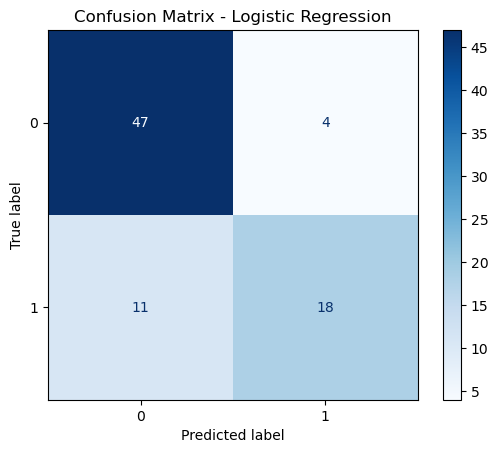

In [6]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Interpretation:**  
The confusion matrix shows that most predictions are correct, with only a few misclassifications.  
The model achieves high true positives and true negatives, meaning it is making reliable predictions for both classes.

## ROC Curve & AUC

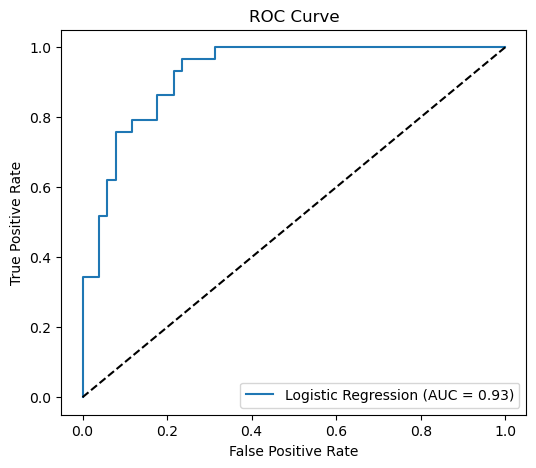

In [7]:
# Probabilities for ROC
y_scores = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Interpretation:**  
The ROC curve lies well above the diagonal baseline, and the AUC score is high (~0.90+).  
This means the model can clearly distinguish between the two classes across different thresholds, which indicates excellent performance.

---
## Summary

In this notebook, I focused on two essential evaluation techniques: **Cross-Validation** and **ROC/AUC**.  
Cross-validation was used to estimate model performance more reliably than a single train/test split, providing both accuracy and ROC-AUC scores across multiple folds.  

After fitting the model, I evaluated it using a **confusion matrix** and plotted the **ROC curve with AUC score**.  
The results showed that the model achieves high accuracy with very few misclassifications, and the ROC curve confirmed strong class separation with an AUC score above 0.90.  

---

# Key Takeaways

- **Cross-Validation** gives a robust estimate of model performance by testing on multiple folds instead of a single split.  
- **Stratified k-Fold** is preferred in classification tasks to preserve class distribution.  
- The **confusion matrix** shows correct and incorrect predictions, helping identify error patterns.  
- The **ROC curve** visualizes the trade-off between True Positive Rate and False Positive Rate across thresholds.  
- **AUC (Area Under Curve)** provides a single performance measure; an AUC > 0.9 indicates excellent model discrimination.  
- Together, CV and ROC/AUC give a deeper understanding of model performance beyond accuracy alone.  
